# Client Scaling of OSTs

This notebook visualizes the throughput of the entire file system as client count increases.

In [1]:
%matplotlib inline

In [2]:
import glob
import matplotlib
matplotlib.rcParams['font.size'] = 18
import matplotlib.pyplot
import pandas

In [3]:
import iorparse

In [4]:
OUTPUT_FORMAT = 'pdf' # png, jpg, ... or None to not save

In [25]:
# Load results
raw_results = {
    'numnodes': [],
    'writerate': [],
}
for ior_output in glob.glob('results/fpp_*.out'):
    for line in open(ior_output, 'r'):
        if line.startswith('write') and 'POSIX' in line:
            args = line.split()
            rate = float(args[1])
            ranks = int(args[13])
            ppn = int(args[14])
            nodes = ranks//ppn
            raw_results['numnodes'].append(nodes)
            raw_results['writerate'].append(rate)

writerates_mibs = pandas.DataFrame.from_dict(raw_results).set_index('numnodes').sort_index().iloc[:, 0]
writerates_gibs = writerates / 2.0**10.0
writerates_gibs.name = 'writerate_gibs'
writerates_gibs

numnodes
1        2.632002
2        7.866885
4       14.823613
8       27.672402
16      46.277217
32      68.205391
64     129.830186
128    189.786875
256    241.076631
512    308.411523
Name: writerate_gibs, dtype: float64

Text(0.5, 0, 'Client Count')

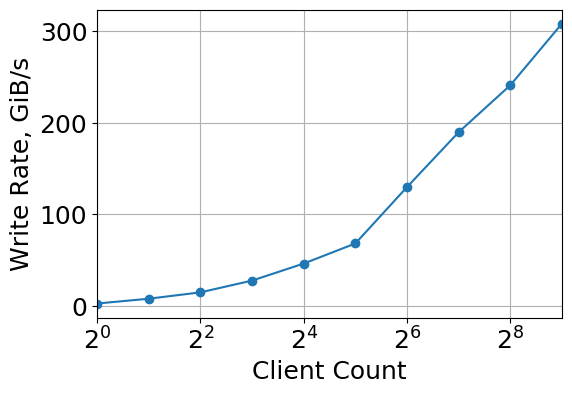

In [30]:
fig, ax = matplotlib.pyplot.subplots()
writerates_gibs.plot(marker="o", ax=ax)
ax.set_xscale("log", basex=2)
ax.grid()
ax.set_ylabel("Write Rate, GiB/s")
ax.set_xlabel("Client Count")

In [ ]:
if OUTPUT_FORMAT:
    ax.get_figure().savefig('client-scaling.%s' % OUTPUT_FORMAT, bbox_inches='tight')